In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from chart_studio import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
%matplotlib inline
import numpy as np
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import pandas as pd 
countries_of_interest_df = pd.read_csv("merged_Dataset.csv")


/tmp/ipykernel_16680/2711204123.py:11: DtypeWarning:

Columns (147,149,150,151,153,155,156,157) have mixed types. Specify dtype option on import or set low_memory=False.



Helper Functions

In [12]:
# Function to calculate the total number of people who migrated from a country in a given year,
# if no destination country is provided, it returns the total number of people migrated from the origin country regardless of the destination country.
def col_sum(source, year, gender, age, type, origin_country=None, destination_country=None):
    """
    source : String 
           for dataset from EUROSTAT 'ESTAT'
           for dataset from UN 'UN'

    year :String 
            year for the data
    gender : String 
            'T' for both, 
            'M' for Male, 
            'F' for Female
    age : String 
            'T' for all ages, 
            for below 15 '<15', 
            between 15- 64 '15-64',
            above 64 '>64',
    type : String 
           for citizen type migration 'cit',
           for residence type migration 'res'
    origin_country: String  
            name of the origin country
    destination_country : 
            String name of the destination country
    """

    # If both origin and destination countries are provided
    if origin_country and destination_country:
        # Calculate the sum of migration from origin to destination country
        value = countries_of_interest_df[
            (countries_of_interest_df['origin_name'] == origin_country) & 
            (countries_of_interest_df['destination_name'] == destination_country)
        ][f'{source}_{year}_{gender}_{age}_{type}'].sum()

    # If only origin country is provided
    elif origin_country:
        # Calculate the sum of migration from origin country to any destination
        value = countries_of_interest_df[
            (countries_of_interest_df['origin_name'] == origin_country)
        ][f'{source}_{year}_{gender}_{age}_{type}'].sum()

    return value


In [13]:
# This function, with the help of col_sum() function, will build a bar graph for a country showing the total number of people,
# total number of male, and total number of female migrants from that country in the time span of 5 years from 2014-2019 for ESTAT
# and from 2015-2019 for UN dataset.
def bar_graph_of_country(origin_country, source, type):
    '''
    source : String 
           for dataset from EUROSTAT 'ESTAT'
           for dataset from UN 'UN'
    origin_country: String  
            name of the origin country
    type : String 
           for citizen type migration 'cit',
           for residence type migration 'res'
    '''

    # Check if the source is from the UN dataset
    if source == "UN":  # for UN we have data for the years 2015-2019
        # Build a dictionary for the data for each year
        graph_for_a_country = {
            '2015': {'Both': col_sum(source, "2015", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2015", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2015", "F", "T", type, origin_country)},
            '2016': {'Both': col_sum(source, "2016", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2016", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2016", "F", "T", type, origin_country)},
            '2017': {'Both': col_sum(source, "2017", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2017", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2017", "F", "T", type, origin_country)},
            '2018': {'Both': col_sum(source, "2018", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2018", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2018", "F", "T", type, origin_country)},
            '2019': {'Both': col_sum(source, "2019", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2019", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2019", "F", "T", type, origin_country)}
        }
    else:  # for ESTAT we have data for the years 2014-2019
        # Build a dictionary for the data for each year
        graph_for_a_country = {
            '2014': {'Both': col_sum(source, "2014", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2014", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2014", "F", "T", type, origin_country)},
            '2015': {'Both': col_sum(source, "2015", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2015", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2015", "F", "T", type, origin_country)},
            '2016': {'Both': col_sum(source, "2016", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2016", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2016", "F", "T", type, origin_country)},
            '2017': {'Both': col_sum(source, "2017", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2017", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2017", "F", "T", type, origin_country)},
            '2018': {'Both': col_sum(source, "2018", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2018", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2018", "F", "T", type, origin_country)},
            '2019': {'Both': col_sum(source, "2019", "T", "T", type, origin_country),
                     'Male': col_sum(source, "2019", "M", "T", type, origin_country),
                     'Female': col_sum(source, "2019", "F", "T", type, origin_country)}
        }

    return graph_for_a_country


Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with residence status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

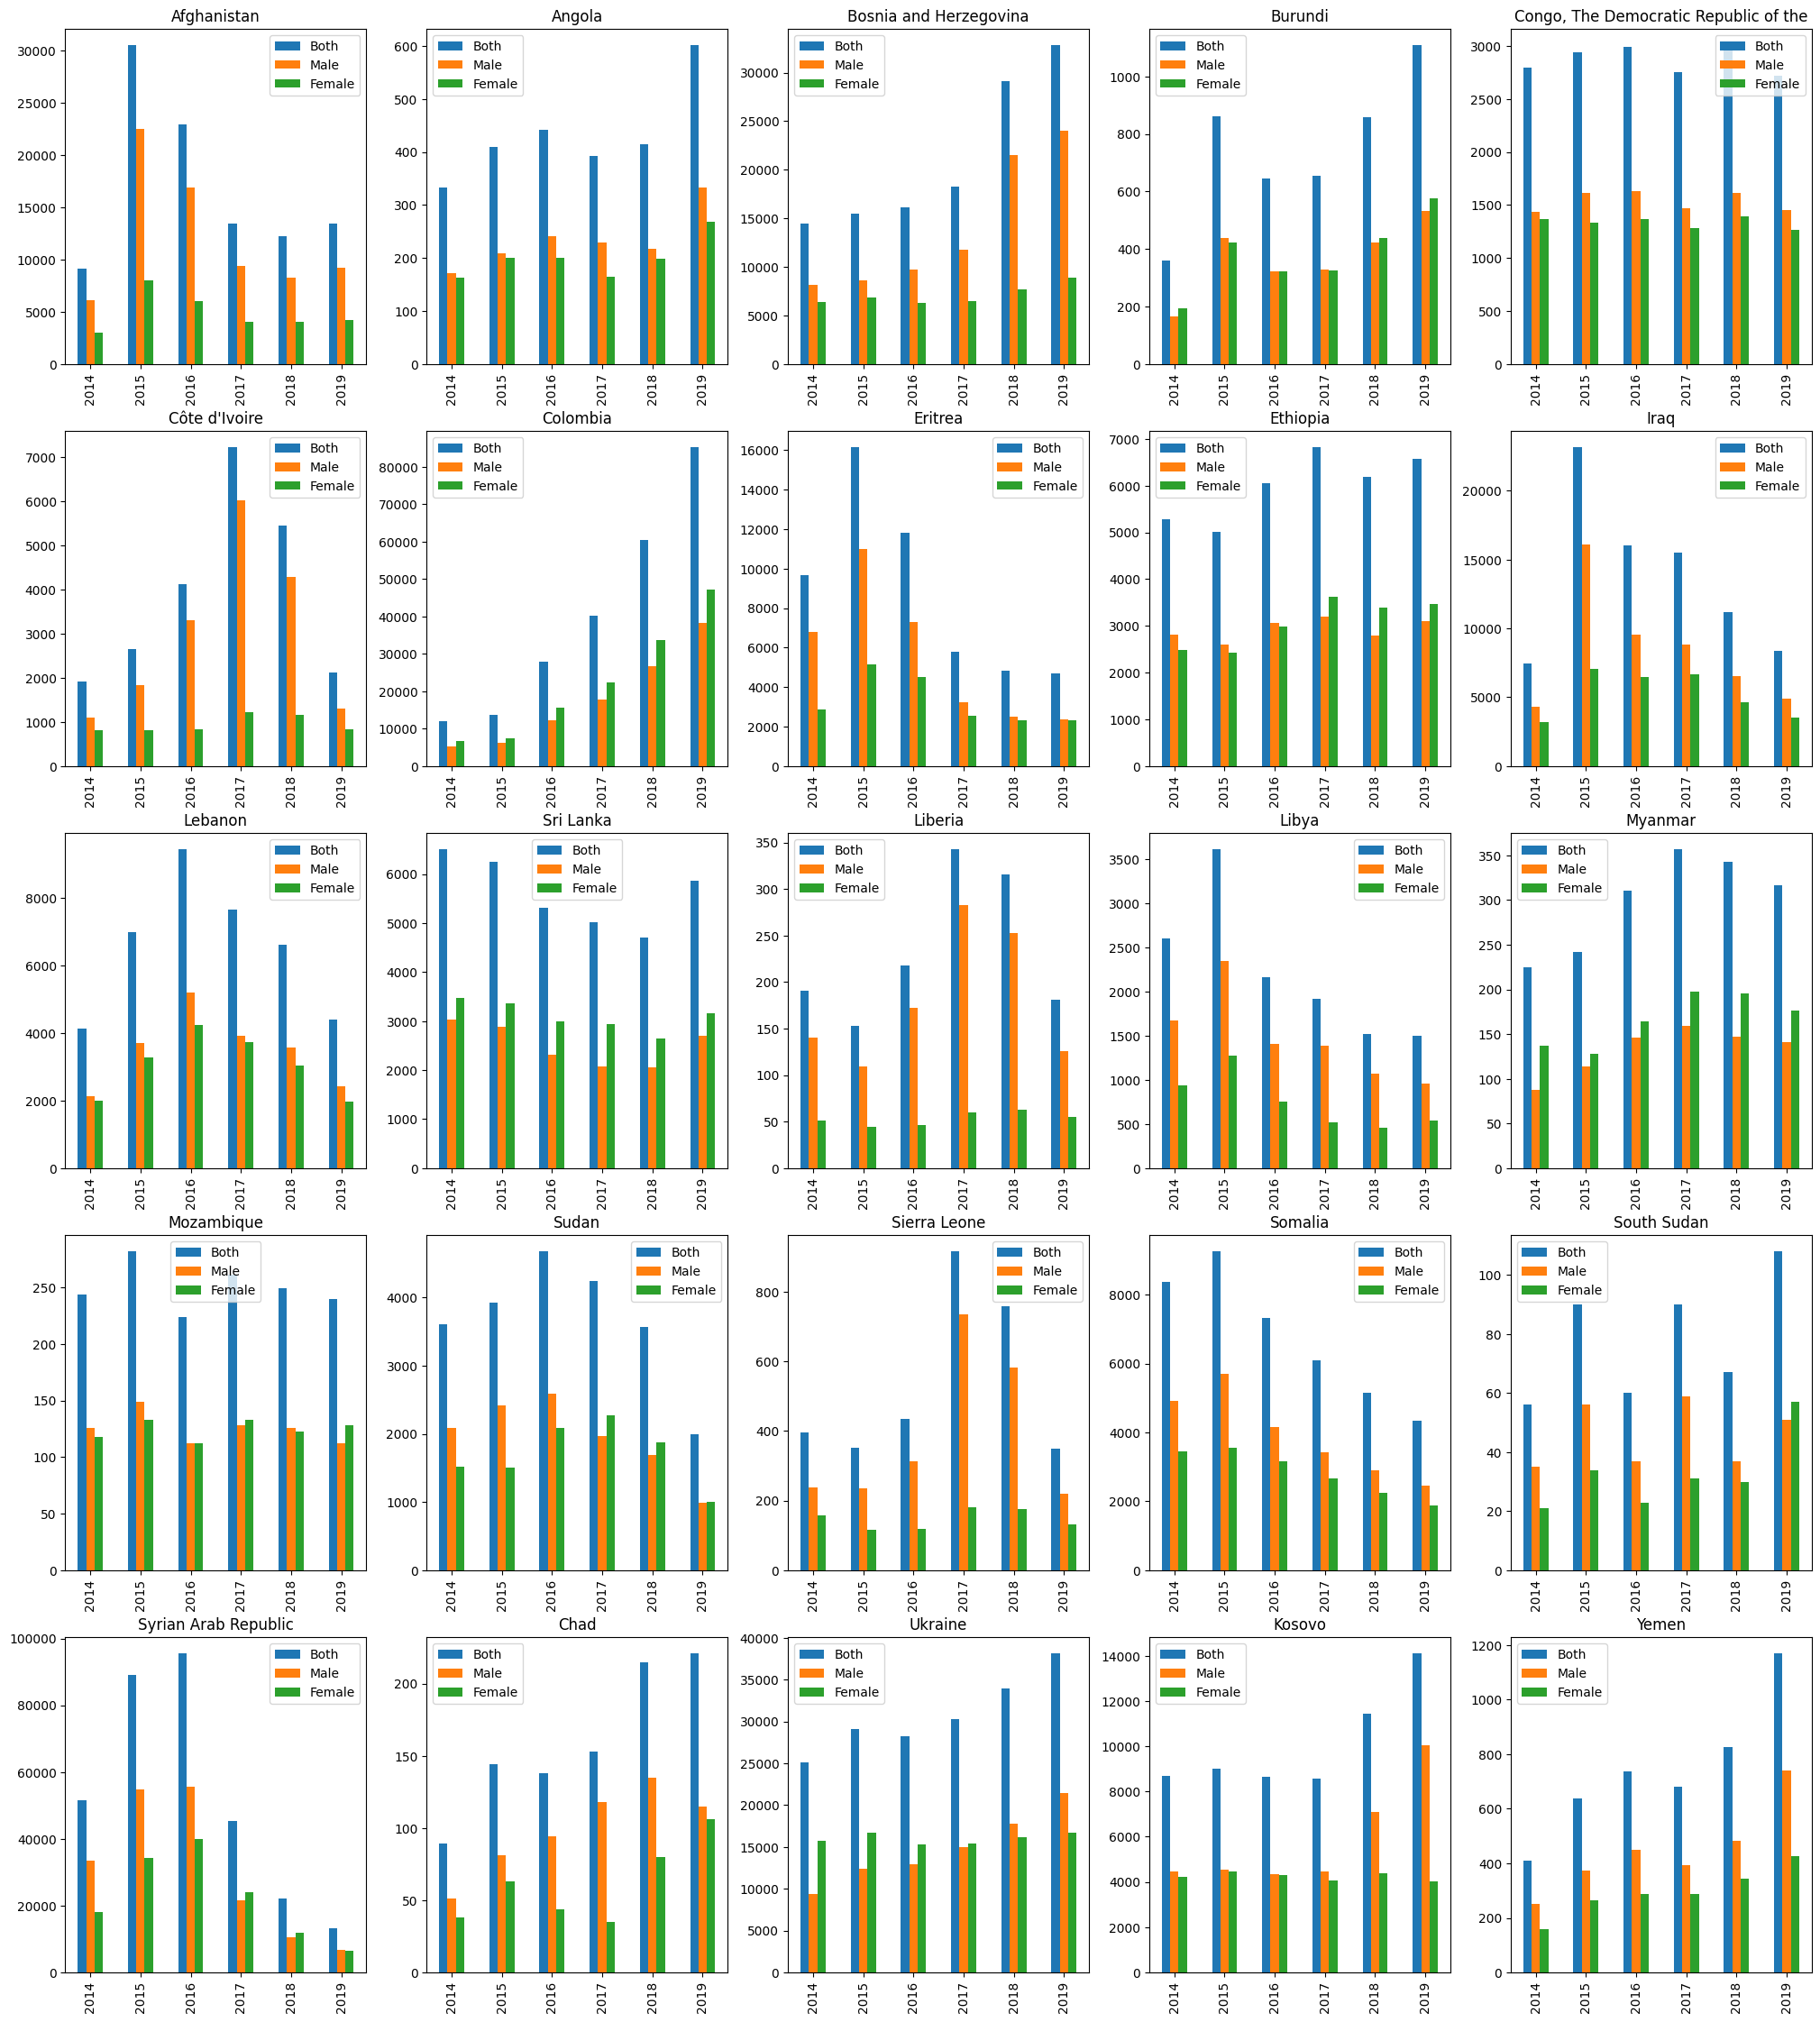

In [10]:
#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "res")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])






Examining the graph from Euro estate's dataset, it becomes evident that, generally, more men migrate compared to women in various countries. However, there are instances where the migration rate for women slightly exceeds that of men. Notably, in countries such as Sri Lanka, Myanmar, Sudan, Mozambique, Colombia, Ethiopia, and Madagascar, instances occur where women's migration rate surpasses that of men, highlighting significant variations in migration patterns between genders and showcasing distinct trends in specific countries.
By conducting a simple search on the internet to find the reason, we discover that gender disparities in migration are influenced by factors like a preference for societies with gender equality, economic opportunities, and sociocultural elements. Women often migrate independently in search of better work and education, contributing to a more balanced gender representation in migration flows. Stable nations tend to exhibit a more even gender distribution in migration, fostering opportunities for both men and women.
Education and empowerment play key roles in driving female migration, as women seek growth in societies offering these opportunities. Government policies promoting gender equality also shape migration patterns. A comprehensive understanding requires exploration of specific data points, recognizing the complex interplay of economic, social, and political factors in migration dynamics.


Bar graph showing Male, Female and Both(Male and Female) ratio of the imigrants with citizenship status in the respective years w.r.t the origin country. The results are for ESTAT dataset.

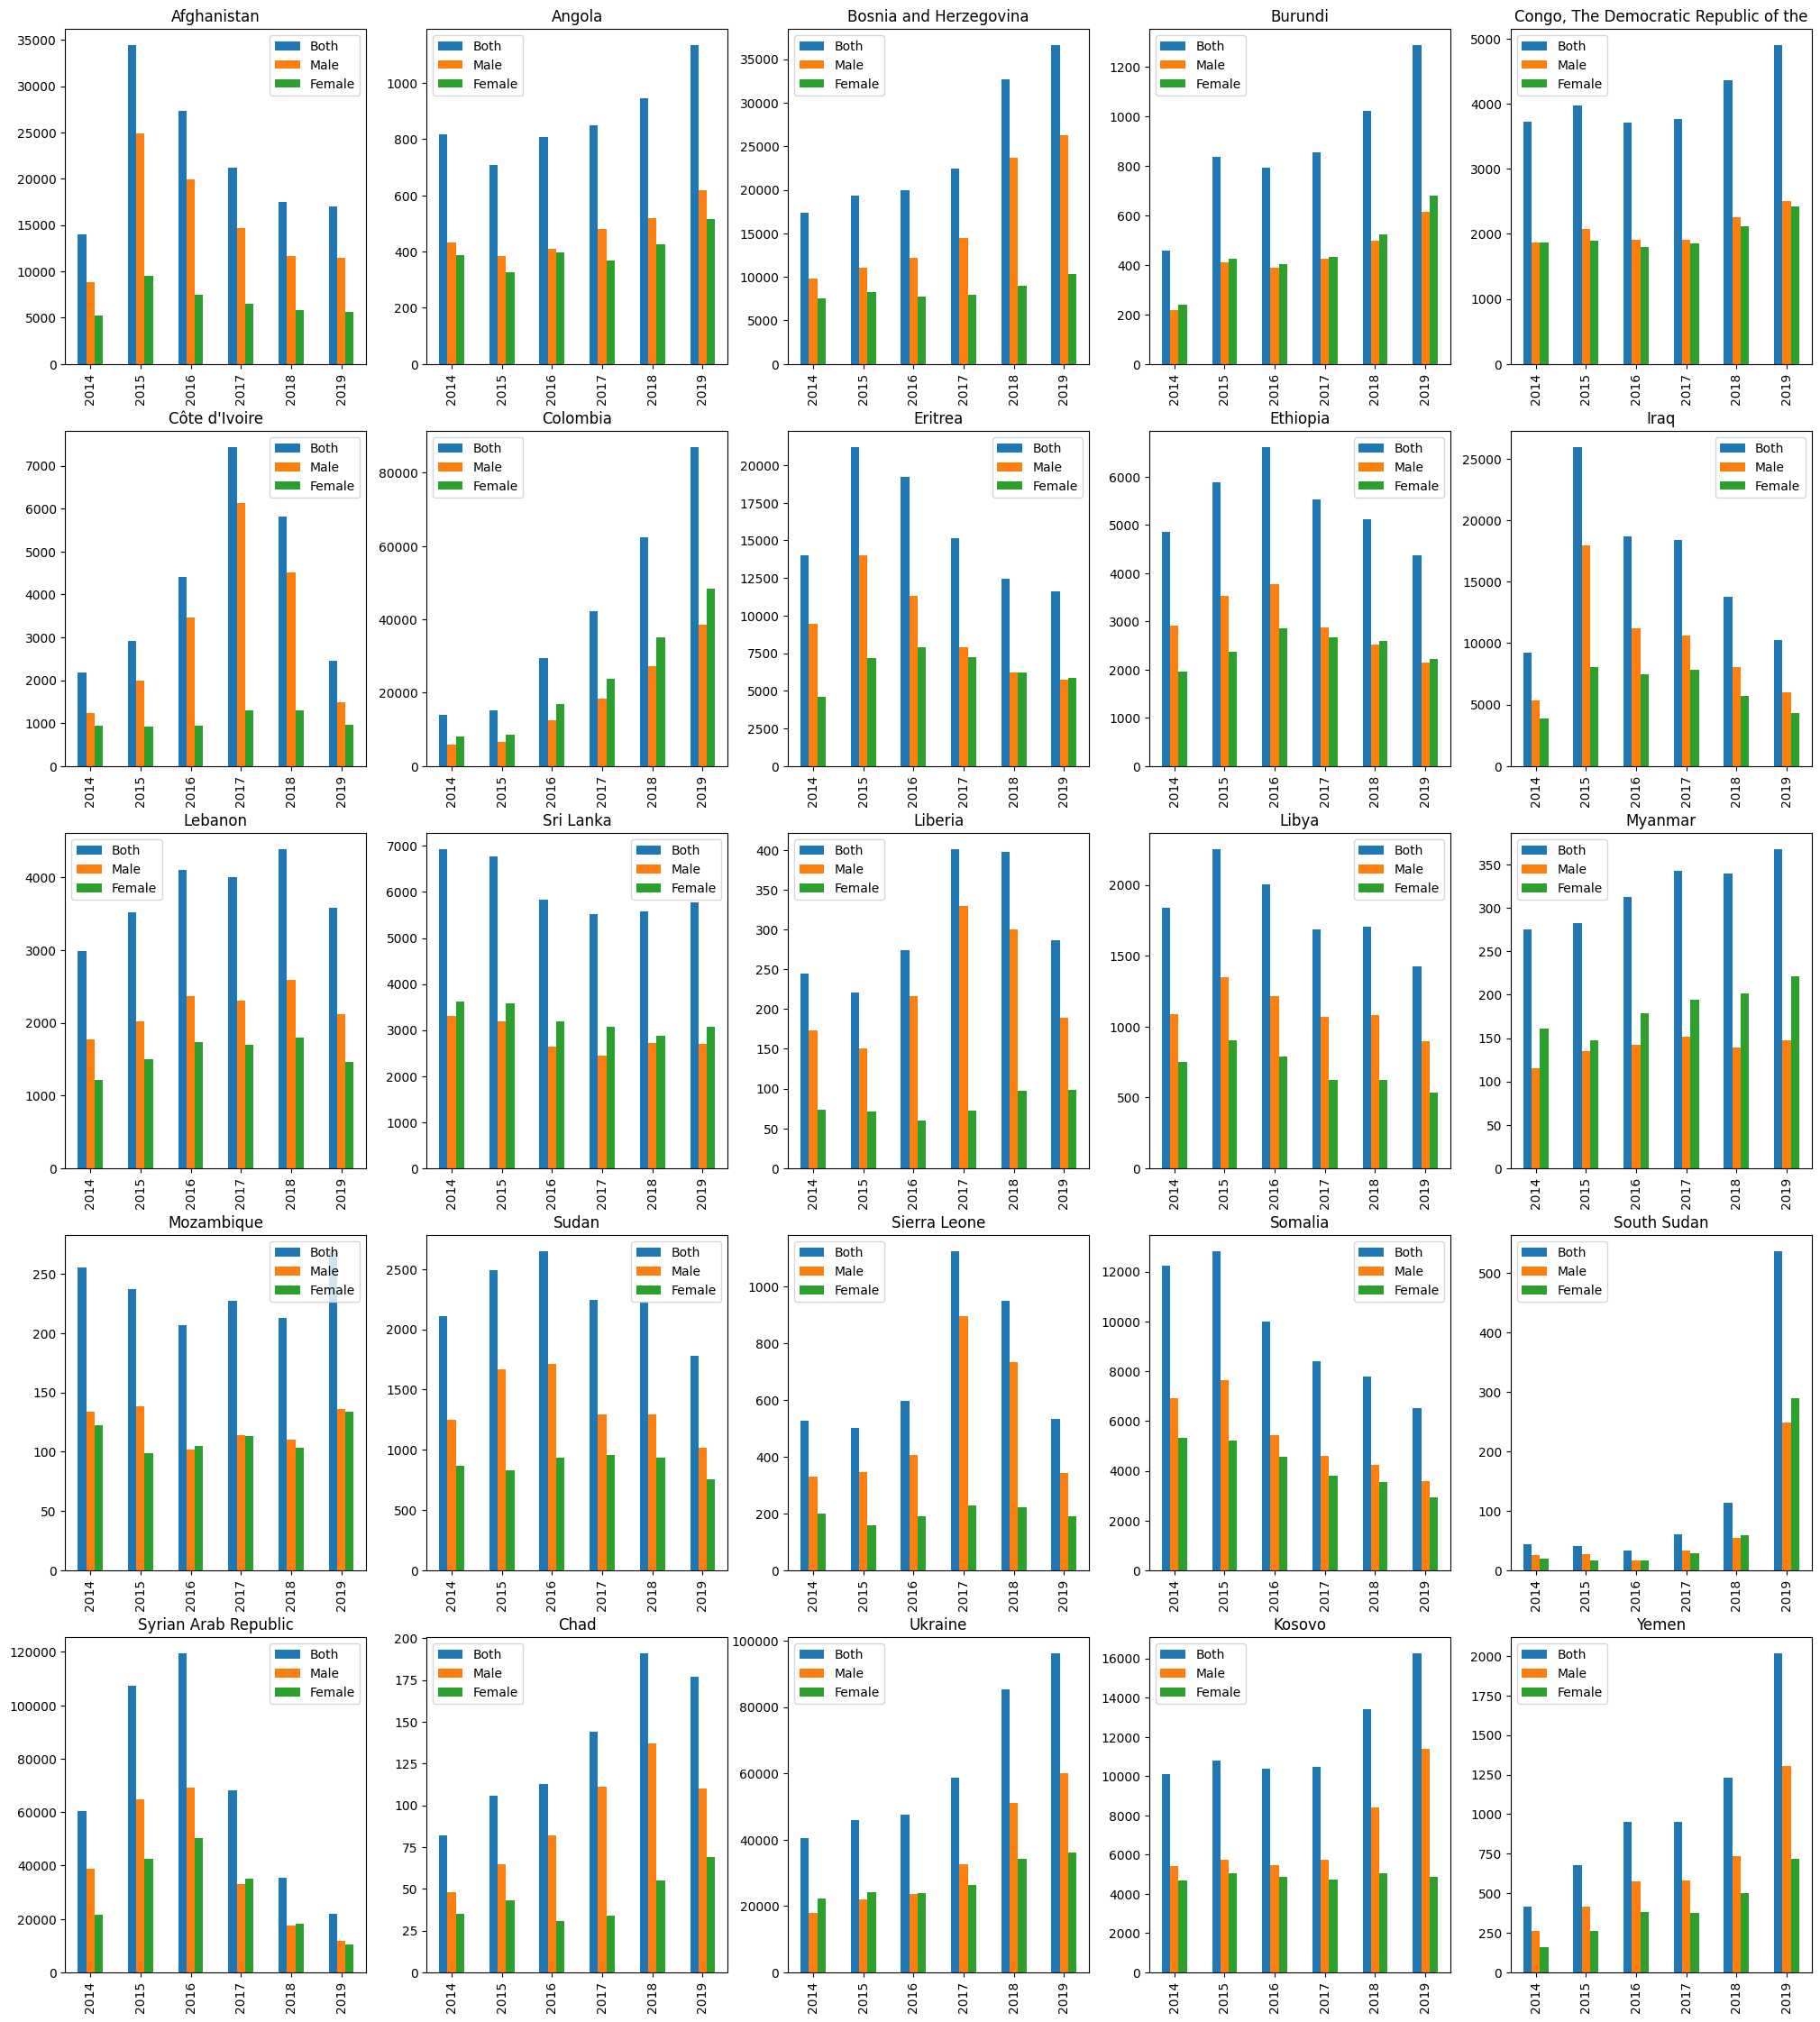

In [5]:
#geting a list of the unique country names
country_names = countries_of_interest_df['origin_name'].unique().tolist()
#dividing the single list into 5 nested lists for convenience for the later part where we will plot graph
country_names = [country_names[i:i+5] for i in range(0, len(country_names), 5)]
fig, axes = plt.subplots(5, 5, figsize=(25,28))
#by making nested lists we can iterated over the country names and also plot the graph at the given axis easily
for i in range(0,5):
    for j in range(0,5):
        graph_for_a_country = bar_graph_of_country(country_names[i][j], "ESTAT", "cit")
        x = pd.DataFrame(graph_for_a_country)
        #this is the part where our nested list will come handy, we can use the same i and j indices for axis[i,j] 
        #that we used above to fetch country name
        x.transpose().plot(ax=axes[i,j], kind='bar', title= country_names[i][j])

Seperated DataFrame which shows total number of emigrants from the origin countries who left their countries to seek residence in 6 years(2014-2019)

In [6]:
residence_perpose = countries_of_interest_df
residence_perpose['residence_sum_5_years'] = residence_perpose['ESTAT_2014_F_T_res'] + residence_perpose['ESTAT_2015_F_T_res'] + residence_perpose['ESTAT_2016_F_T_res'] + residence_perpose['ESTAT_2017_F_T_res']+residence_perpose['ESTAT_2018_F_T_res']+residence_perpose['ESTAT_2019_F_T_res']

group_residence = residence_perpose.groupby(['origin_name', 'origin_alpha_3'])
group_residence = group_residence.agg({'residence_sum_5_years': np.sum})

group_residence = pd.DataFrame(group_residence)
group_residence = group_residence.reset_index()


# sum_group_residence = group_residence['residence_sum_5_years'].sum()
# sum_group_residence = pd.DataFrame(sum_group_residence)
# sum_group_residence['origin_name']
# # size = group.agg({'destination_name':[np.size]})
# group[['ESTAT_2014_F_T_res']+['ESTAT_2015_F_T_res']].


C:\Users\samue\AppData\Local\Temp\ipykernel_14020\1282738831.py:5: FutureWarning:

The provided callable <function sum at 0x0000017ADA0FC7C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [7]:


init_notebook_mode(connected=True) 
data = dict(type = 'choropleth',
            locations = group_residence['origin_alpha_3'],
            locationmode = 'ISO-3',
            colorscale= 'temps',
            
            text= group_residence['origin_name'],
            z=group_residence['residence_sum_5_years'],
            colorbar = {'title':'Number of migrants'})
layout = dict(geo = {'scope':'world'}, title= "Graph showing number of migrants from Post conflict contries with Residence status")
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

Seperated DataFrame which shows total number of emigrants from the origin countries who left their countries to seek citizenship in 6 years(2014-2019)

In [8]:
citizen_perpose = countries_of_interest_df
citizen_perpose['citizen_sum_5_years'] = citizen_perpose['ESTAT_2014_F_T_cit'] + citizen_perpose['ESTAT_2015_F_T_cit'] + citizen_perpose['ESTAT_2016_F_T_cit'] + citizen_perpose['ESTAT_2017_F_T_cit']+citizen_perpose['ESTAT_2018_F_T_res']+citizen_perpose['ESTAT_2019_F_T_cit']

group_citizen = citizen_perpose.groupby(['origin_name', 'origin_alpha_3'])
group_citizen = group_citizen.agg({'citizen_sum_5_years': np.sum})

group_citizen = pd.DataFrame(group_citizen)
group_citizen = group_citizen.reset_index()
group_citizen

C:\Users\samue\AppData\Local\Temp\ipykernel_14020\2014147544.py:5: FutureWarning:

The provided callable <function sum at 0x0000017ADA0FC7C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



,origin_name,origin_alpha_3,citizen_sum_5_years
0,Afghanistan,AFG,37865.0
1,Angola,AGO,1977.0
2,Bosnia and Herzegovina,BIH,48685.0
3,Burundi,BDI,2591.0
4,Chad,TCD,288.0
5,Colombia,COL,138902.0
6,"Congo, The Democratic Republic of the",COD,11058.0
7,Côte d'Ivoire,CIV,6067.0
8,Eritrea,ERI,34732.0
9,Ethiopia,ETH,15296.0


In [9]:
#ploting countries on worldmap
data = dict(type = 'choropleth',
            locations = group_citizen['origin_alpha_3'],
            locationmode = 'ISO-3',
            colorscale= 'temps',
            
            text= group_citizen['origin_name'],
            z=group_citizen['citizen_sum_5_years'],
            colorbar = {'title':'Number of migrants'})
layout = dict(geo = {'scope':'world'}, title= "Graph showing number of migrants from Post conflict contries with Citizen Status")
choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [10]:
#to seperate numeric type columns for Analysis
data = []
for i in countries_of_interest_df.columns:
    if is_numeric_dtype(countries_of_interest_df[i]):
        data.append(i)
    
print(data)

['ESTAT_2014_T_T_cit', 'ESTAT_2014_T_T_res', 'ESTAT_2014_T_<15_cit', 'ESTAT_2014_T_<15_res', 'ESTAT_2014_T_15-64_cit', 'ESTAT_2014_T_15-64_res', 'ESTAT_2014_T_>64_cit', 'ESTAT_2014_T_>64_res', 'ESTAT_2014_M_T_cit', 'ESTAT_2014_M_T_res', 'ESTAT_2014_M_<15_cit', 'ESTAT_2014_M_<15_res', 'ESTAT_2014_M_15-64_cit', 'ESTAT_2014_M_15-64_res', 'ESTAT_2014_M_>64_cit', 'ESTAT_2014_M_>64_res', 'ESTAT_2014_F_T_cit', 'ESTAT_2014_F_T_res', 'ESTAT_2014_F_<15_cit', 'ESTAT_2014_F_<15_res', 'ESTAT_2014_F_15-64_cit', 'ESTAT_2014_F_15-64_res', 'ESTAT_2014_F_>64_cit', 'ESTAT_2014_F_>64_res', 'ESTAT_2015_T_T_cit', 'ESTAT_2015_T_T_res', 'ESTAT_2015_T_<15_cit', 'ESTAT_2015_T_<15_res', 'ESTAT_2015_T_15-64_cit', 'ESTAT_2015_T_15-64_res', 'ESTAT_2015_T_>64_cit', 'ESTAT_2015_T_>64_res', 'ESTAT_2015_M_T_cit', 'ESTAT_2015_M_T_res', 'ESTAT_2015_M_<15_cit', 'ESTAT_2015_M_<15_res', 'ESTAT_2015_M_15-64_cit', 'ESTAT_2015_M_15-64_res', 'ESTAT_2015_M_>64_cit', 'ESTAT_2015_M_>64_res', 'ESTAT_2015_F_T_cit', 'ESTAT_2015_F_T_r

Relation between origin countries GDP and number of migrants over the period of 6 years (2014-2019)

C:\Users\samue\AppData\Local\Temp\ipykernel_14020\3209684613.py:10: FutureWarning:

The provided callable <function sum at 0x0000017ADA0FC7C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\samue\AppData\Local\Temp\ipykernel_14020\3209684613.py:10: FutureWarning:

The provided callable <function sum at 0x0000017ADA0FC7C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



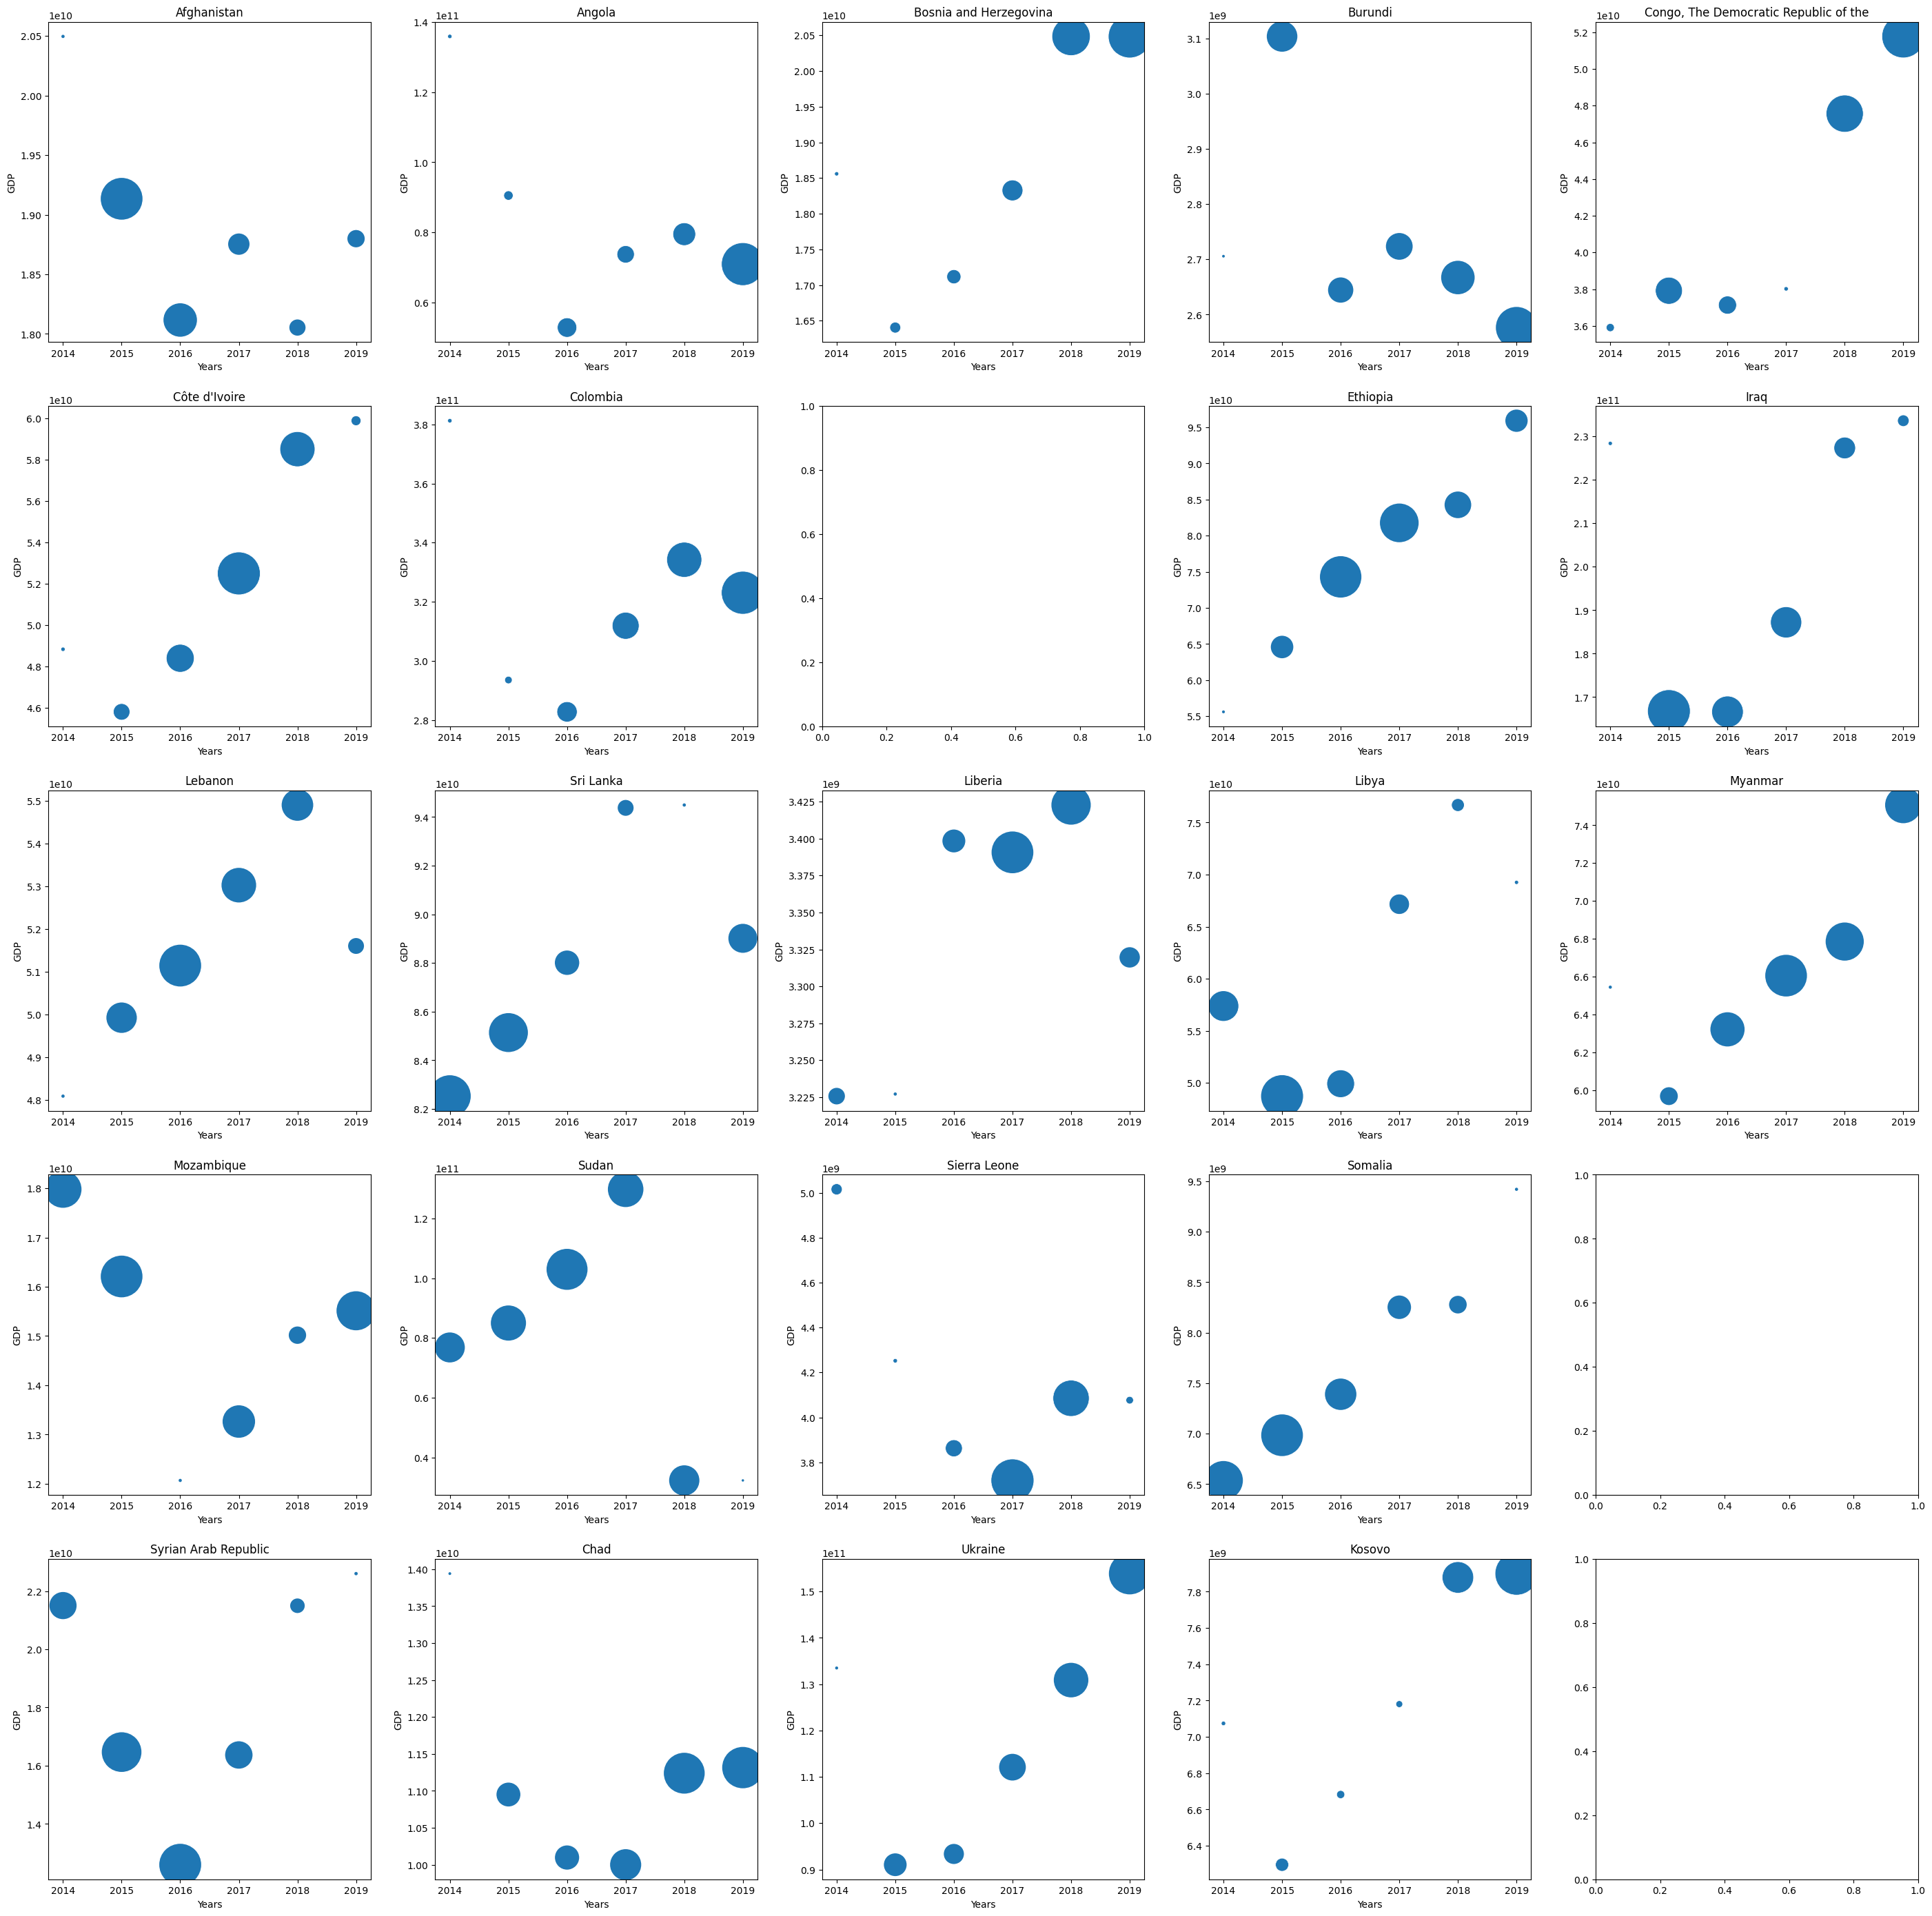

In [11]:
GDP=  countries_of_interest_df
#seperate columns for total of resident and citizen emmigrants
GDP ['Estst_Total_migrant_2014'] = GDP['ESTAT_2014_T_T_cit']+GDP['ESTAT_2014_T_T_res']
GDP ['Estst_Total_migrant_2015'] = GDP['ESTAT_2015_T_T_cit']+GDP['ESTAT_2015_T_T_res']
GDP ['Estst_Total_migrant_2016'] = GDP['ESTAT_2016_T_T_cit']+GDP['ESTAT_2016_T_T_res']
GDP ['Estst_Total_migrant_2017'] = GDP['ESTAT_2017_T_T_cit']+GDP['ESTAT_2017_T_T_res']
GDP ['Estst_Total_migrant_2018'] = GDP['ESTAT_2018_T_T_cit']+GDP['ESTAT_2018_T_T_res']
GDP ['Estst_Total_migrant_2019'] = GDP['ESTAT_2019_T_T_cit']+GDP['ESTAT_2019_T_T_res']
gdp_group = GDP.groupby(['origin_name','origin_gdp_2014','origin_gdp_2015','origin_gdp_2016','origin_gdp_2017','origin_gdp_2018','origin_gdp_2019'])
group_cit_gdp = gdp_group.agg({'Estst_Total_migrant_2014': np.sum,
                               'Estst_Total_migrant_2015': np.sum,
                                   'Estst_Total_migrant_2016': np.sum,
                                   'Estst_Total_migrant_2017': np.sum,
                                   'Estst_Total_migrant_2018': np.sum,
                                   'Estst_Total_migrant_2019': np.sum})

group_cit_gdp
group_cit_gdp = pd.DataFrame(group_cit_gdp)
group_cit_gdp=group_cit_gdp.reset_index()

#columns for x axis values
X = ['Estst_Total_migrant_2014','Estst_Total_migrant_2015','Estst_Total_migrant_2016',
                                   'Estst_Total_migrant_2017',
                                   'Estst_Total_migrant_2018',
                                   'Estst_Total_migrant_2019']
#columns for y axis values
Y = ['origin_gdp_2014','origin_gdp_2015','origin_gdp_2016','origin_gdp_2017','origin_gdp_2018','origin_gdp_2019']


empty = ['Eritrea','South Sudan', 'Yemen'] #countries whos gdp is missing in the data
fig,ax = plt.subplots(5,5, figsize=(35,35))



x=['2014','2015','2016','2017','2018','2019']
for i in range(0,5):
    for j in range(0,5):
        population=[]
        gdp=[]
        
        if country_names[i][j] not in empty:
            for E in X:

                #creating seperate list for columns values using the X list column names
                population.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][E].item())
            for G in Y:
                #creating seperate list for gdp values using the Y list column names
                gdp.append(group_cit_gdp[group_cit_gdp['origin_name']==country_names[i][j]][G].item())
            sns.scatterplot(x=x, y=gdp, size=population, legend=False, sizes=(20, 2000), ax=ax[i][j]).set_title(country_names[i][j])
            ax[i][j].set_xlabel("Years")
            ax[i][j].set_ylabel("GDP")
            
            







Destination Countries from 2014-2019

C:\Users\samue\AppData\Local\Temp\ipykernel_14020\525653424.py:2: FutureWarning:

The provided callable <function sum at 0x0000017ADA0FC7C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.

C:\Users\samue\AppData\Local\Temp\ipykernel_14020\525653424.py:2: FutureWarning:

The provided callable <function sum at 0x0000017ADA0FC7C0> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



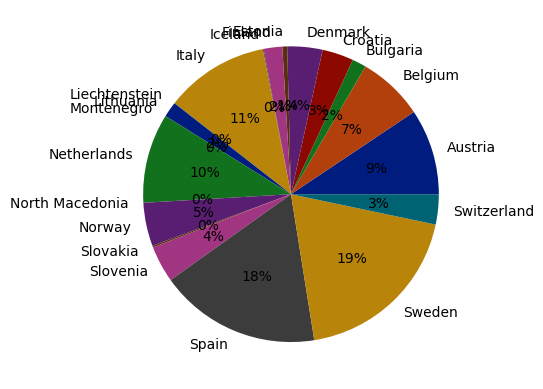

In [12]:
#grouping by destination name and gdp
destination_group = GDP.groupby(['destination_name','destination_gdp_2014','destination_gdp_2015','destination_gdp_2016','destination_gdp_2017','destination_gdp_2018','destination_gdp_2019']).agg({'Estst_Total_migrant_2014': np.sum,
                               'Estst_Total_migrant_2015': np.sum,
                                   'Estst_Total_migrant_2016': np.sum,
                                   'Estst_Total_migrant_2017': np.sum,
                                   'Estst_Total_migrant_2018': np.sum,
                                   'Estst_Total_migrant_2019': np.sum})
#replacing the 0.0 values with nan to drop the rows where all the values are nan i.e. countries with no immigrants
destination_group = destination_group.replace(0.0, np.nan)
#dropping nan rows
destination_group = destination_group.dropna(axis = 0, how = 'all')
#converting the grouped data to Dataframe 
destination_group = pd.DataFrame(destination_group).reset_index()

#adding a new column with total number of immigrants in sum years
destination_group['Total_6_years'] = destination_group['Estst_Total_migrant_2014']+ destination_group['Estst_Total_migrant_2015']+destination_group['Estst_Total_migrant_2016']+destination_group['Estst_Total_migrant_2017']+destination_group['Estst_Total_migrant_2018']+destination_group['Estst_Total_migrant_2019']
#converting nan to zeros for calculations
destination_group = destination_group.replace(np.nan,0)

palette_color = sns.color_palette('dark')

plt.pie(destination_group['Total_6_years'].to_list(), labels=destination_group['destination_name'].to_list(), colors=palette_color, autopct='%.0f%%') 

plt.show()  


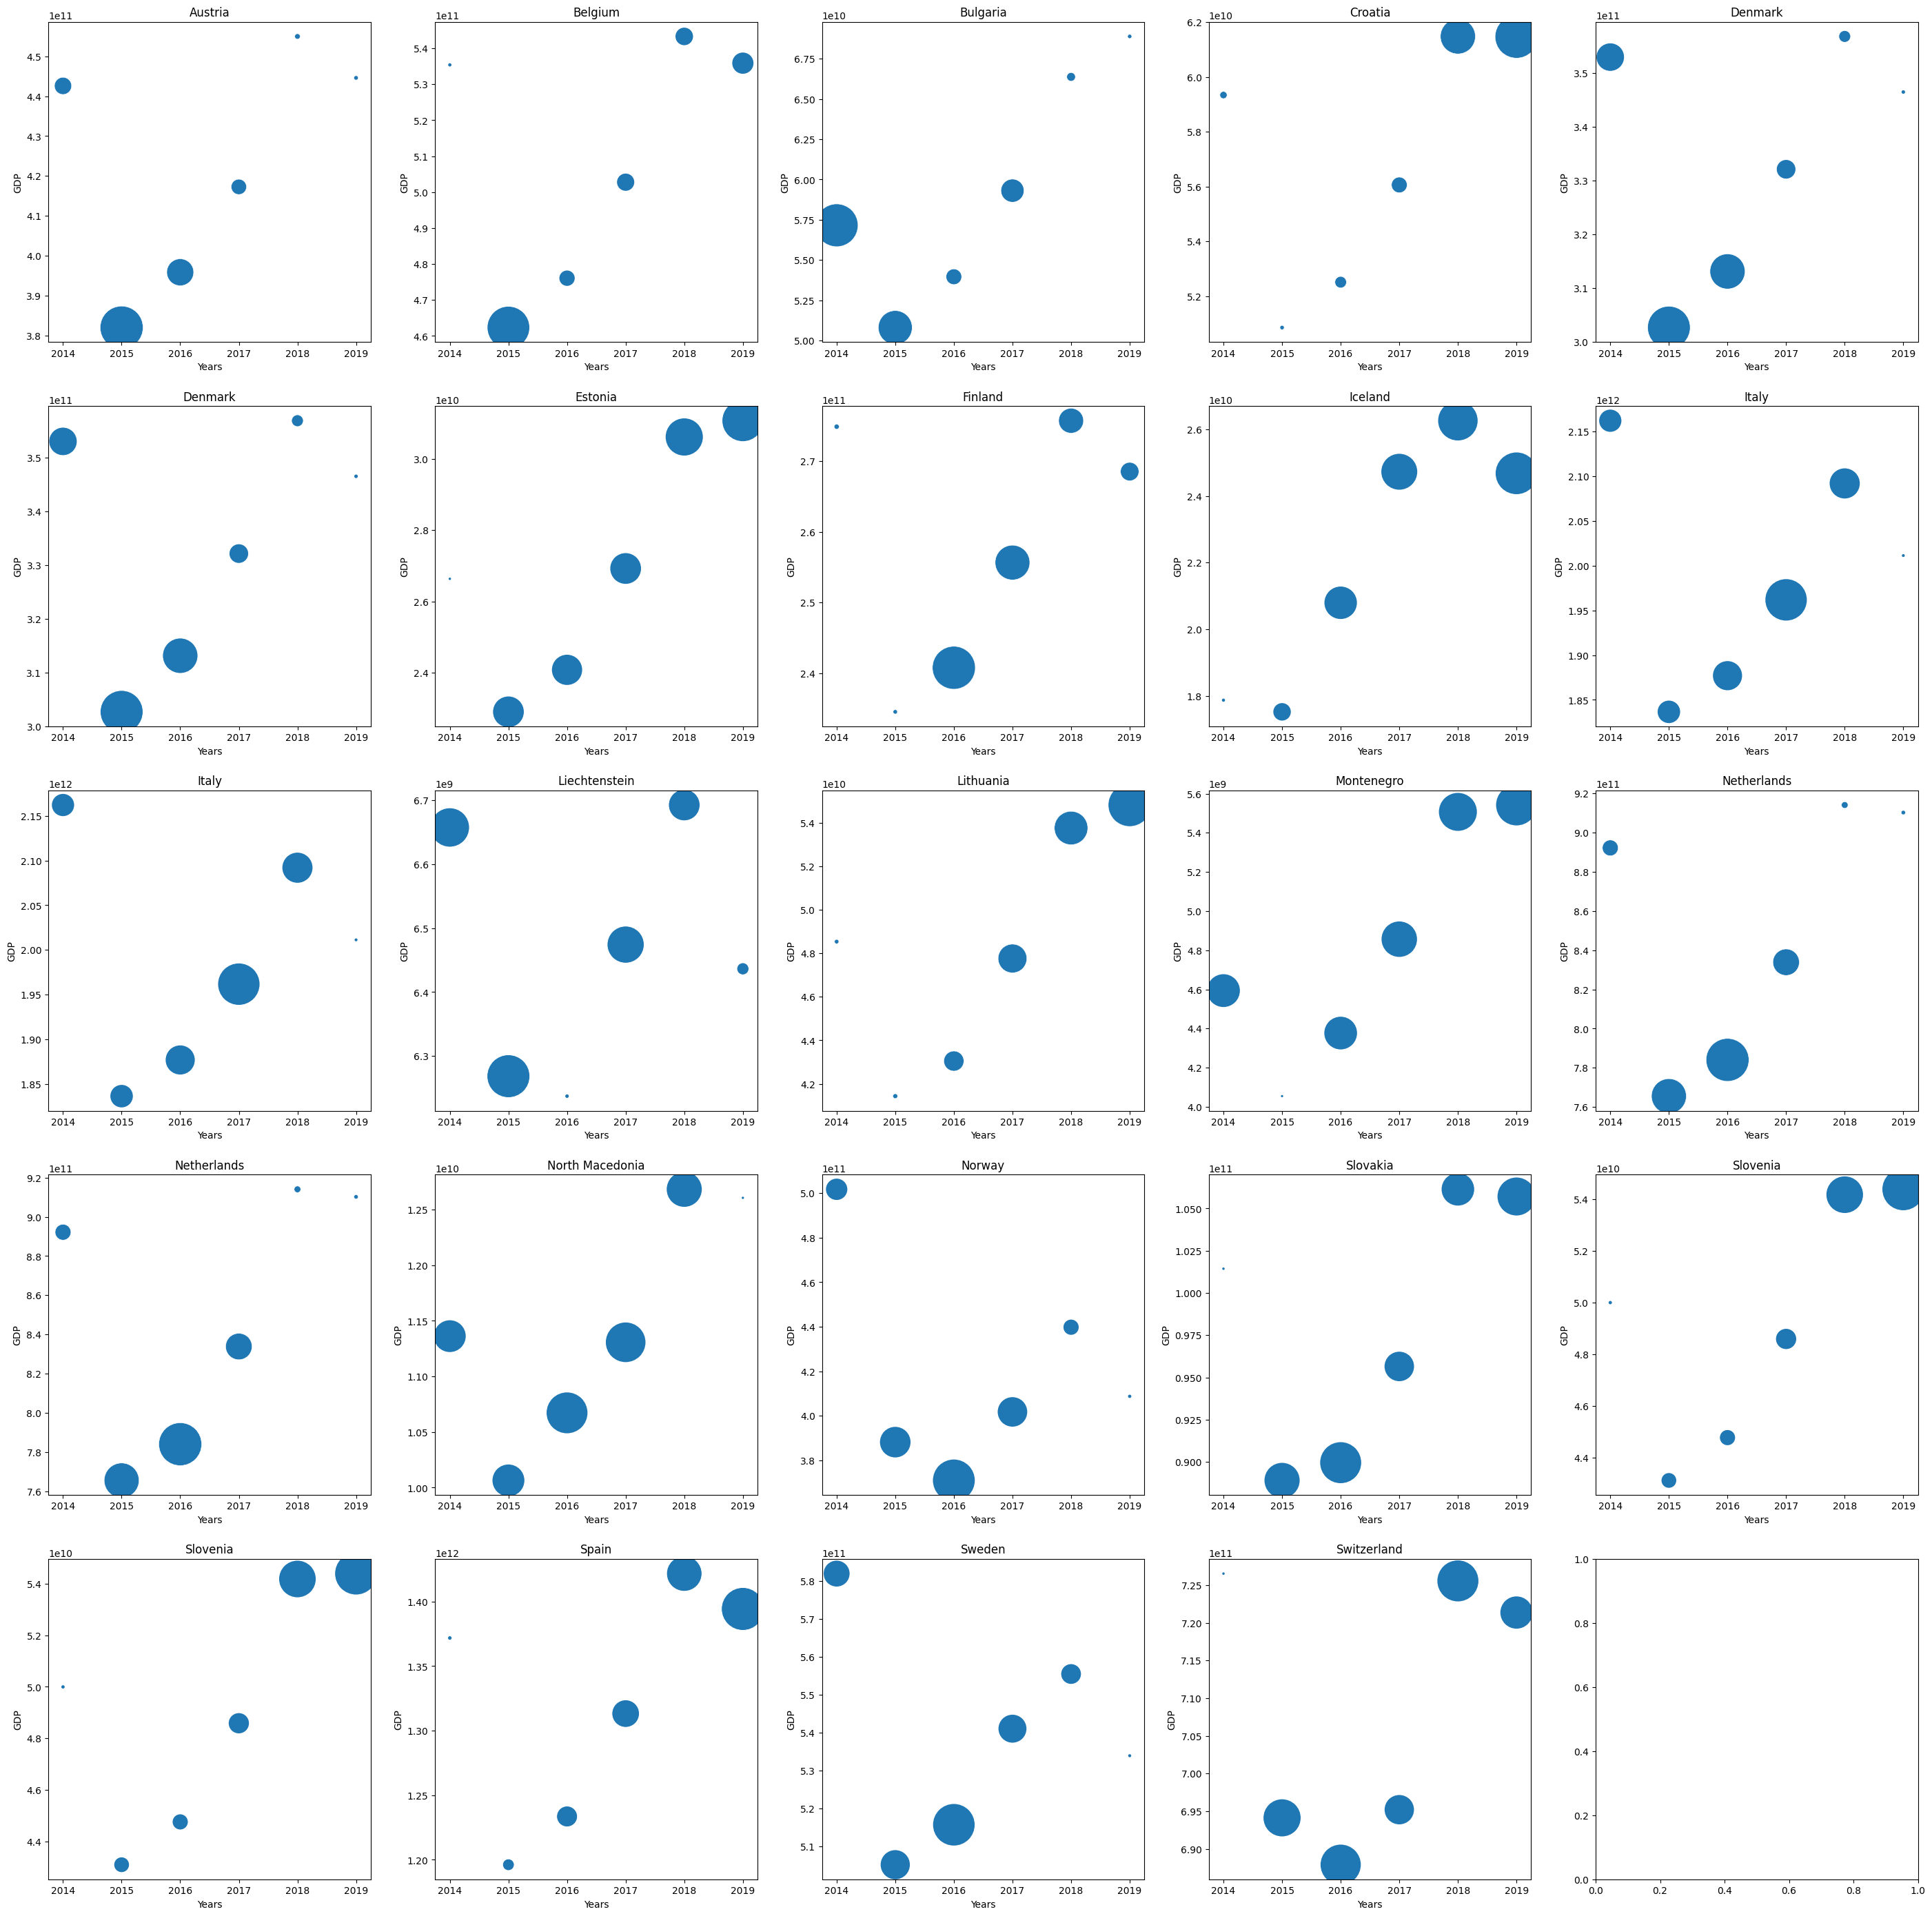

In [13]:
destination_countries = destination_group['destination_name'].to_list()
#dividing list into sublists for subplots
destination_countries = [destination_countries[i:i+5] for i in range(0, len(destination_countries), 4)]
destination_countries
fig,ax = plt.subplots(5,5, figsize=(35,35))
#COlumns names for population data
X = ['Estst_Total_migrant_2014','Estst_Total_migrant_2015','Estst_Total_migrant_2016',
                                   'Estst_Total_migrant_2017',
                                   'Estst_Total_migrant_2018',
                                   'Estst_Total_migrant_2019']
#columns for y axis values
Y = ['destination_gdp_2014','destination_gdp_2015','destination_gdp_2016','destination_gdp_2017','destination_gdp_2018','destination_gdp_2019']
#x-axis labels
x=['2014','2015','2016','2017','2018','2019']
for i in range(0,5):
    for j in range(0,5):
        #the last sub list has length of 4, so to avaid index error will break the loop when j > length 
        if j>=len(destination_countries[i]):
            break
        population=[]
        gdp=[]
        
        
        for E in X:
            #creating seperate list for columns values using the X list column names
            population.append(destination_group[destination_group['destination_name']==destination_countries[i][j]][E].item())
        for G in Y:
            #creating seperate list for gdp values using the Y list column names
            gdp.append(destination_group[destination_group['destination_name']==destination_countries[i][j]][G].item())
        sns.scatterplot(x=x, y=gdp, size=population, legend=False, sizes=(20, 2000), ax=ax[i][j]).set_title(destination_countries[i][j])
        ax[i][j].set_xlabel("Years")
        ax[i][j].set_ylabel("GDP")


            

Favourite destination countries of migrants from conflicted countries

In [14]:
GDP['Total_6_years'] = GDP['Estst_Total_migrant_2014']+ GDP['Estst_Total_migrant_2015']+GDP['Estst_Total_migrant_2016']+GDP['Estst_Total_migrant_2017']+GDP['Estst_Total_migrant_2018']+GDP['Estst_Total_migrant_2019']
idx = GDP.groupby('origin_name')['Total_6_years'].idxmax() #getting rows for each country where the number of emmigrants where maximum
favourite_destination= pd.DataFrame(GDP.loc[idx])
favourite_destination[['origin_name','destination_name', 'Total_6_years','geodesic_distance_km']]

,origin_name,destination_name,Total_6_years,geodesic_distance_km
1,Afghanistan,Austria,67306.0,4636.538275
82,Angola,Belgium,3020.0,6958.978978
213,Bosnia and Herzegovina,Slovenia,91670.0,326.198961
227,Burundi,Belgium,5982.0,6446.514154
1656,Chad,Italy,537.0,2987.462572
482,Colombia,Spain,439322.0,8040.015722
297,"Congo, The Democratic Republic of the",Belgium,25294.0,6266.452572
400,Côte d'Ivoire,Italy,39650.0,4201.838103
642,Eritrea,Sweden,52826.0,5276.632409
707,Ethiopia,Netherlands,21872.0,5733.854601
